In [1]:
import numpy as np
import netCDF4 as ncdf
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import glob as glob
import os as os
import sys as sys
from file_tools import *
from wrf import getvar, interplevel

# get some stuff set up.

omega       = ['VVEL_P0_L105_GLC0','OMEGA']
pressure    = ['PRES_P0_L105_GLC0', 'PRES']
temperature = ['TMP_P0_L105_GLC0', 'TEMP']

variables   = [omega, pressure, temperature]

# These are 45 vertical levels that the FV3 puts out - use them here to map ARW to that grid for comparison

plevels = np.asarray([100000.,  97500.,  95000.,  92500.,  90000.,  87500.,  85000.,  82500.,
                       80000.,  77500.,  75000.,  72500.,  70000.,  67500.,  65000.,  62500.,
                       60000.,  57500.,  55000.,  52500.,  50000.,  47500.,  45000.,  42500.,
                       40000.,  37500.,  35000.,  32500.,  30000.,  27500.,  25000.,  22500.,
                       20000.,  17500.,  15000.,  12500.,  10000.,   7000.,   5000.,   3000.,
                        2000.,   1000.,    700.,    500.,    200.])
nz_new = plevels.shape[0]

_w_threshold = 5.0
_Rgas       = 287.04
_gravity    = 9.806

sw_corner = (27.776199263795622, -97.43436259615146)
ne_corner = (38.36255932569569, -81.65435850459758)

In [2]:
fv3_dir   = '/Users/Louis.Wicker/04May2021_RRFS/mem1'
fv3_files = sorted(glob.glob(fv3_dir+'/rrfs.*.nc4'))
ds_FV3 = []

for file in fv3_files:
    
    ds_FV3.append(fv3_extract_variables_over_region(file, sw_corner = sw_corner, ne_corner = ne_corner, writeout=True, prefix=None))
    print(f'Successfully created dataframe for file:  {file}\n')

print(ds_FV3)

FV3_Extract: Extracting variables over region from input file: /Users/Louis.Wicker/04May2021_RRFS/mem1/rrfs.t00z.mem01.naf018.nc4 

Creating a sub-region of DataArray: 27.78, -97.43, 38.36, -81.65 

Successfully created interpolated fields from file:  /Users/Louis.Wicker/04May2021_RRFS/mem1/rrfs.t00z.mem01.naf018.nc4 

Successfully wrote new data to file:: /Users/Louis.Wicker/04May2021_RRFS/mem1/region.t00z.mem01.naf018.nc4 

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_RRFS/mem1/rrfs.t00z.mem01.naf018.nc4

FV3_Extract: Extracting variables over region from input file: /Users/Louis.Wicker/04May2021_RRFS/mem1/rrfs.t00z.mem01.naf019.nc4 

Creating a sub-region of DataArray: 27.78, -97.43, 38.36, -81.65 

Successfully created interpolated fields from file:  /Users/Louis.Wicker/04May2021_RRFS/mem1/rrfs.t00z.mem01.naf019.nc4 

Successfully wrote new data to file:: /Users/Louis.Wicker/04May2021_RRFS/mem1/region.t00z.mem01.naf019.nc4 

Successfully created dataframe

In [2]:
arw_dir   = '/Users/Louis.Wicker/04May2021_HRRR'
arw_files = sorted(glob.glob(arw_dir+'/hrrr.*.nc4'))

ds_WRF = []

for file in arw_files:

    tmp, outfilename = wrf_extract_variables_over_region(file, sw_corner = sw_corner, ne_corner = ne_corner, writeout=True, prefix=None)
    print(f'Successfully created dataframe for file:  {file}','\n')


    ds_WRF.append(tmp)

print(ds_WRF)



WRF_Extract: Extracting variables over region from input file: /Users/Louis.Wicker/04May2021_HRRR/hrrr.20210504_conus_hrrr.t00z.wrfnatf18.nc4 

Creating a sub-region of DataArray: 27.78, -97.43, 38.36, -81.65 

0
100
200
300
400
500
Successfully created interpolated fields from file:  /Users/Louis.Wicker/04May2021_HRRR/hrrr.20210504_conus_hrrr.t00z.wrfnatf18.nc4 

Successfully wrote new data to file:: /Users/Louis.Wicker/04May2021_HRRR/region.20210504_conus_hrrr.t00z.wrfnatf18.nc4 

Successfully created dataframe for file:  /Users/Louis.Wicker/04May2021_HRRR/hrrr.20210504_conus_hrrr.t00z.wrfnatf18.nc4 

WRF_Extract: Extracting variables over region from input file: /Users/Louis.Wicker/04May2021_HRRR/hrrr.20210504_conus_hrrr.t00z.wrfnatf19.nc4 

Creating a sub-region of DataArray: 27.78, -97.43, 38.36, -81.65 

0
100
200
300
400
500
Successfully created interpolated fields from file:  /Users/Louis.Wicker/04May2021_HRRR/hrrr.20210504_conus_hrrr.t00z.wrfnatf19.nc4 

Successfully wrote new

No handles with labels found to put in legend.
No handles with labels found to put in legend.


TypeError: 'Text' object is not callable

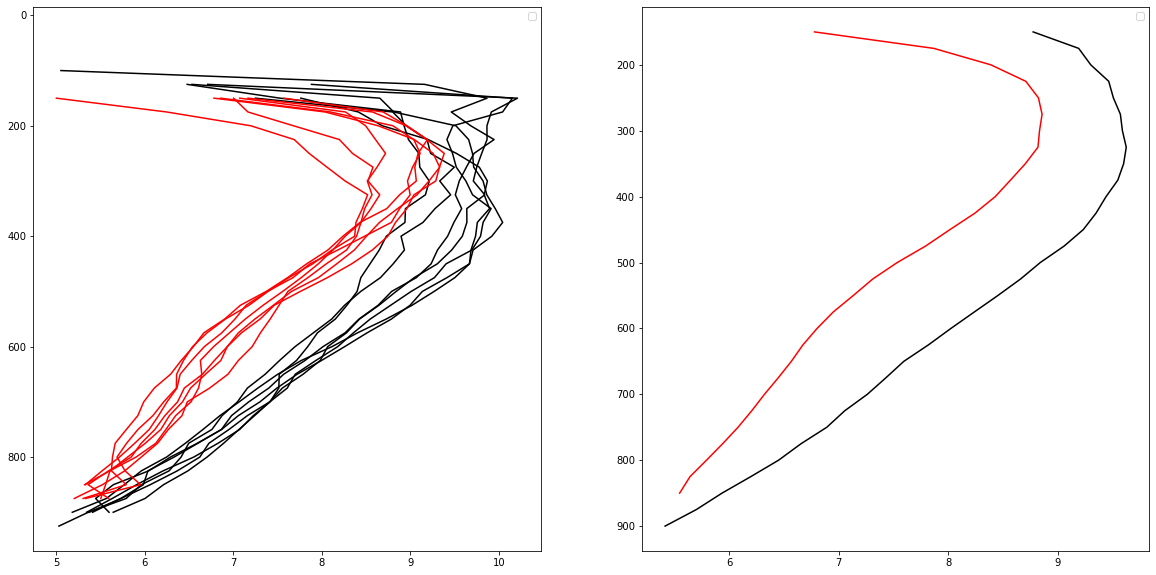

In [40]:
figsize = (20,10)
fig, (ax1,ax2) = plt.subplots(1,2, figsize = figsize)

wrf_mean = np.zeros((7,nz_new))
fv3_mean = np.zeros((7,nz_new))

for n, item in enumerate(ds_WRF):
    dsW_WRF = item.where( item.W_interp > _w_threshold )
    dsWmean_WRF = dsW_WRF.W_interp.mean(dim=("ny","nx"), skipna=True, keep_attrs=False)
    ax1.plot(dsWmean_WRF.values, plevels/100., color='black')
    wrf_mean[n,:] = dsWmean_WRF.values

for n, item in enumerate(ds_FV3):    
    dsW_FV3 = item.where( item.W > _w_threshold )
    dsWmean_FV3 = dsW_FV3.W.mean(dim=("ny","nx"), skipna=True, keep_attrs=False)
    ax1.plot(dsWmean_FV3.values, plevels/100., color='red')
    fv3_mean[n,:] = dsWmean_FV3.values
    
ax1.invert_yaxis()
ax2.invert_yaxis()

ax2.plot(wrf_mean.mean(axis=0), plevels/100., color='black')
ax2.plot(fv3_mean.mean(axis=0), plevels/100., color='red')
ax1.legend()
ax2.legend()
ax1.set_title("Hourly WRF and FV3 Regional Udraft profiles from 18-00Z")
ax2.set_title("Average WRF and FV3 regional Udraft profiles")



In [ ]:
plt.show()